# simple model

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


# load data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
data = {
    "train_images": train_images,
    "test_images": test_images,
    "train_labes": train_labels,
    "test_labels": test_labels
}

## type

In [5]:
for key in data:
    print(f"{key}: {type(data[key])}")

train_images: <class 'numpy.ndarray'>
test_images: <class 'numpy.ndarray'>
train_labes: <class 'numpy.ndarray'>
test_labels: <class 'numpy.ndarray'>


## shape

In [6]:
for key in data:
    print(f"{key}: {data[key].shape}")

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)
train_labes: (60000,)
test_labels: (10000,)


## range

In [7]:
for key in data:
    print(f"{key}: {data[key].min()}, {data[key].max()}")

train_images: 0, 255
test_images: 0, 255
train_labes: 0, 9
test_labels: 0, 9


## labels

In [8]:
np.unique(train_labels), np.unique(test_labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

## sample

In [9]:
# train_images[0]

## look at data

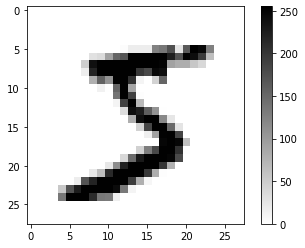

In [10]:
plt.figure()
# plt.imshow(train_images[0])
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [11]:
train_labels[0]

5

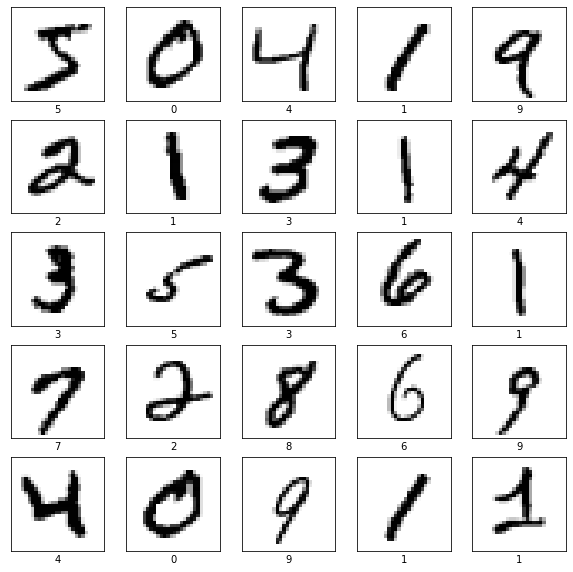

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# preprocess data

In [13]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [14]:
train_images_norm.min(), train_images_norm.max() 

(0.0, 1.0)

In [15]:
test_images_norm.min(), test_images_norm.max() 

(0.0, 1.0)

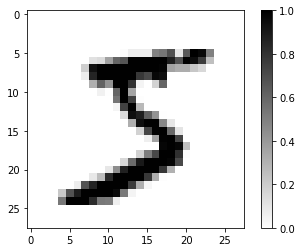

In [16]:
plt.figure()
# plt.imshow(train_images_norm[0])
plt.imshow(train_images_norm[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

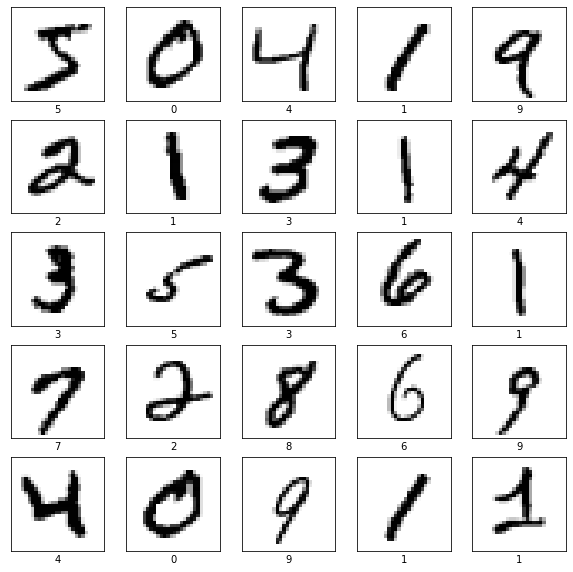

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# build the model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

$$
        \left[\begin{array}{ccc}
            x_{1,1} & \cdots & x_{1,28} \\
            x_{2,1} & \cdots & x_{2,28} \\
            \vdots  & \ddots & \vdots \\
            x_{28,1} & \cdots & x_{28,28} \\
        \end{array}\right]
$$

$$
\left[ x_{1,1} \dots x_{1,28} x_{2,1} \dots x_{2,28} x_{28,1} \dots x_{28,28} \right]
$$

$$
\begin{align}
&y_{1} = relu(w_{11}x_{1} + w_{12}x_{2} + \dots + w_{1,784}x_{784} + b_{1}) \\
&y_{2} = relu(w_{21}x_{1} + w_{22}x_{2} + \dots + w_{2,784}x_{784} + b_{2}) \\
&\vdots \\
&y_{128} = relu(w_{128,1}x_{1} + w_{128,2}x_{2} + \dots + w_{128,784}x_{784} + b_{128})
\end{align}
$$

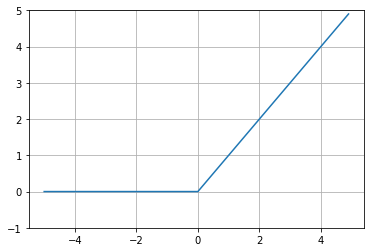

In [19]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
plt.ylim(-1, 5)
plt.grid()
plt.plot(x, relu(x))
plt.show()

$$
\begin{align}
&z_{1} = f(Y_{1}) = Y_{1} = w_{1,1}y_{1} + w_{1,2}y_{2} +\dots w_{1,128}y_{128} + b_{1}\\
&z_{2} = f(Y_{2}) = Y_{2} = w_{2,1}y_{1} + w_{2,2}y_{2} +\dots w_{2,128}y_{128} + b_{2}\\
&\vdots \\
&z_{10} = f(Y_{10}) = Y_{10} = w_{10,1}y_{1} + w_{10,2}y_{2} +\dots w_{10, 128}y_{128} + b_{128}\\
\end{align}
$$

$$
  z_{i} \geq 0 \\
    and \\
    \sum{z_{i}} = 1
$$

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# complie the model

In [21]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
#     //if using tensorflow 2.3.1
#     metrics=["sparse_categorical_accuracy"]
    metrics=["accuracy"]
)

# fit

In [22]:
model.fit(
    train_images_norm,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 1s 587us/step - loss: 0.4392 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 1s 559us/step - loss: 0.1201 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.0776 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 1s 582us/step - loss: 0.0583 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 1s 587us/step - loss: 0.0423 - accuracy: 0.9873


# evaluate

In [24]:
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.0745 - accuracy: 0.9771


[0.07454034686088562, 0.9771000146865845]

# predict

In [30]:
raw_predictions = model.predict(test_images_norm)

In [31]:
raw_predictions.shape

(10000, 10)

In [32]:
raw_predictions[0]

array([ -5.6461124,  -5.5575294,   0.5153691,   2.9601226, -14.103395 ,
        -6.2278776, -12.630276 ,  11.8327265,  -3.0173967,  -1.7214493],
      dtype=float32)

In [33]:
raw_predictions[0].sum()

-33.595818

In [34]:
np.argmax(raw_predictions[0])

7

In [35]:
test_labels[0]

7

## prob model

In [38]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [39]:
predictions = prob_model.predict(test_images_norm)

In [40]:
predictions.shape

(10000, 10)

In [42]:
predictions[0]

array([2.5643033e-08, 2.8018270e-08, 1.2158147e-05, 1.4015545e-04,
       5.4452528e-12, 1.4332185e-08, 2.3756729e-11, 9.9984598e-01,
       3.5530920e-07, 1.2984630e-06], dtype=float32)

In [43]:
predictions[0].sum()

1.0

In [44]:
np.argmax(predictions[0])

7

In [45]:
np.argsort(-predictions[0])

array([7, 3, 2, 9, 8, 1, 0, 5, 6, 4])

In [46]:
np.argsort(-raw_predictions[0])

array([7, 3, 2, 9, 8, 1, 0, 5, 6, 4])

# verify model

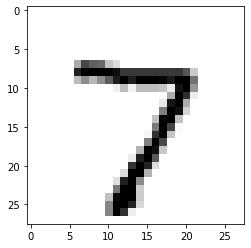

In [48]:
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)
plt.show()

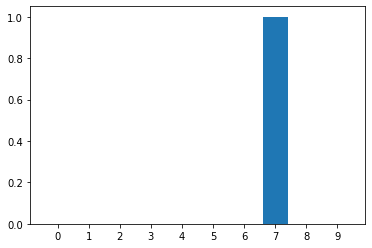

In [50]:
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.show()

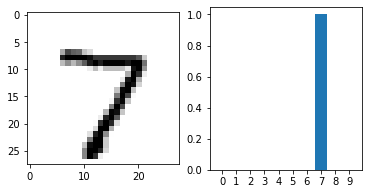

In [51]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))

plt.show()

In [52]:
def verify_prediction(i):
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    plt.imshow(test_images_norm[i], cmap=plt.cm.binary)

    plt.subplot(1,2,2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))

    plt.show()

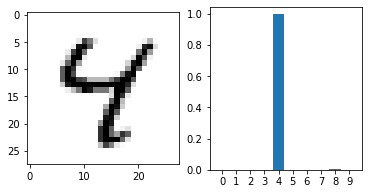

In [59]:
verify_prediction(6)

# use the trained model

In [60]:
img = test_images_norm[0]

In [68]:
# prob_model.predict(img)

In [62]:
img.shape

(28, 28)

In [63]:
img_3axis = np.expand_dims(img, 0)

In [64]:
img_3axis.shape

(1, 28, 28)

In [65]:
prob_model.predict(img_3axis)

array([[2.5643130e-08, 2.8018270e-08, 1.2158170e-05, 1.4015571e-04,
        5.4452528e-12, 1.4332185e-08, 2.3756819e-11, 9.9984598e-01,
        3.5530954e-07, 1.2984641e-06]], dtype=float32)

In [66]:
predictions_single = prob_model.predict(img_3axis)

In [67]:
np.argmax(predictions_single)

7